In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [51]:

data = pd.read_csv("/Users/zahiramohammed/Desktop/DAPM_final_cleaned.csv")

In [52]:
data.head(5)

,Gender,Age,Hyper_Tension,Heart_Disease,Smoking_History,BMI,Blood_Glucose_Level,HbA1c_levels,Diabetes
0,1,1,0,0,0,-0.686567,0,2,0
1,1,2,0,0,1,-0.847830,1,0,0
2,1,2,0,0,0,-0.780009,2,0,0
3,1,2,1,0,0,0.146876,2,1,1
4,1,0,0,0,0,-1.435611,2,0,0


In [53]:
X = data[['Age', 'Diabetes', 'Blood_Glucose_Level']] 

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
data_scaled

array([[-0.67655447, -0.33333333, -1.85042906],
       [ 0.40076156, -0.33333333, -0.62497935],
       [ 0.40076156, -0.33333333,  0.60047036],
       ...,
       [ 0.40076156, -0.33333333, -1.85042906],
       [ 1.47807759,  3.        ,  0.60047036],
       [ 0.40076156, -0.33333333,  0.60047036]])

/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

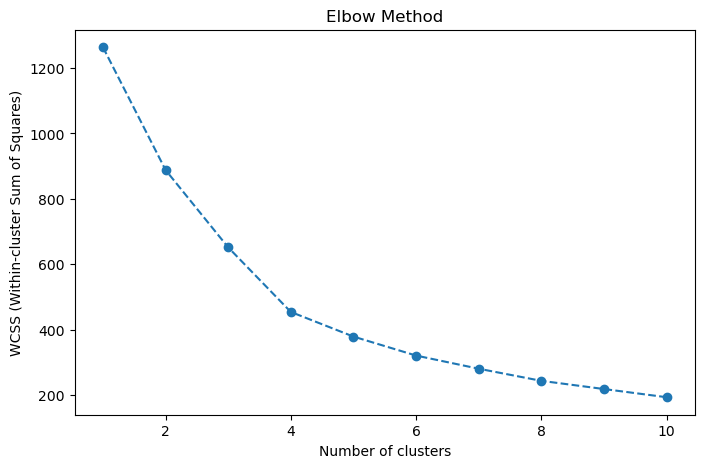

In [47]:
# Determine the optimal number of clusters (K)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

Cluster Statistics:
   Cluster    Gender       Age  Hyper_Tension  Heart_Disease  Smoking_History  \
0        0  0.620192  2.336538       0.139423       0.052885        -0.216346   
1        1  0.451613  0.629032       0.000000       0.016129        -0.193548   
2        2  0.642384  0.721854       0.013245       0.006623        -0.013245   
3        3  0.556962  2.278481       0.063291       0.075949        -0.113924   

        BMI  Blood_Glucose_Level  HbA1c_levels  Diabetes  
0  0.323659             2.000000      0.610577  0.201923  
1 -0.428289             0.241935      0.387097  0.000000  
2 -0.233849             2.000000      0.456954  0.052980  
3 -0.069063             0.278481      0.417722  0.000000  


/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


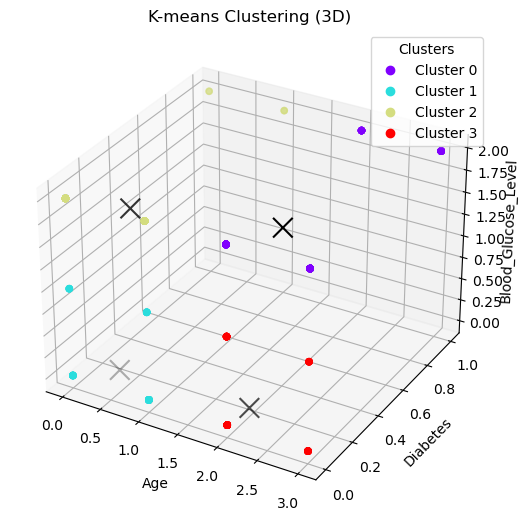

In [57]:
number_of_clusters = 4
kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)
kmeans.fit(X)

cluster_labels = kmeans.labels_

data['Cluster'] = cluster_labels

cluster_centers = kmeans.cluster_centers_

cluster_stats = data.groupby('Cluster').mean().reset_index()

print("Cluster Statistics:")
print(cluster_stats)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  

fig.subplots_adjust(left=0, right=1, bottom=0, top=1)


scatter = ax.scatter(X['Age'], X['Diabetes'], X['Blood_Glucose_Level'], c=cluster_labels, cmap='rainbow')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='x', s=200, c='black')

ax.set_xlabel('Age')
ax.set_ylabel('Diabetes')
ax.set_zlabel('Blood_Glucose_Level', labelpad=-1, y=1.0, rotation=0)

ax.set_title('K-means Clustering (3D)')

legend_labels = [f'Cluster {i}' for i in range(number_of_clusters)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")

plt.show()

In [49]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [58]:
score = silhouette_score(X, cluster_labels)
print('Silhouette Score:', score)

Silhouette Score: 0.5982344987282582
